In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd

#tf.__version__
#keras.__version__ 

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
np.max(X_train_full[0,:, :])

255

In [5]:
y_train_full.shape

(60000,)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

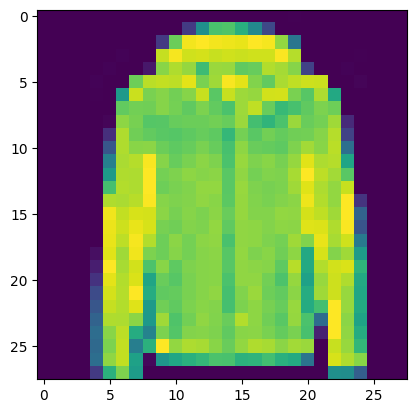

In [10]:
plt.imshow(X_train[0])

### Build an artificial neural network (ANN) using the sequantial model
### (ANN) will take the input of the fashion minst images
### ANN will have 4 layers: 
#### First layer has 64 artificial neurons ( A.K.A units)
#### Second layer has 32  units 
#### Thrid layer has 16  units
#### Fourth layer  has 10  neurons ( A.K.A units)
#### Fifth layer - output layer has 10 units

In [11]:
# Define the sequential model
model = keras.Sequential()

# Add the layers to the model
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 53018 (207.10 KB)
Trainable params: 53018 (207.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile the network using sgd or adam as optimizer

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


### Train the network for 20 epochs

In [14]:

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# Train the model on the training data for 20 epochs
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20


1719/1719 [==============================] - 3s 1ms/step - loss: 0.5737 - accuracy: 0.7981 - val_loss: 71.1934 - val_accuracy: 0.8181
Epoch 2/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4038 - accuracy: 0.8554 - val_loss: 71.3825 - val_accuracy: 0.8288
Epoch 3/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3665 - accuracy: 0.8677 - val_loss: 60.9977 - val_accuracy: 0.8486
Epoch 4/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3435 - accuracy: 0.8740 - val_loss: 80.1190 - val_accuracy: 0.8130
Epoch 5/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3269 - accuracy: 0.8794 - val_loss: 71.7370 - val_accuracy: 0.8202
Epoch 6/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3117 - accuracy: 0.8856 - val_loss: 58.7350 - val_accuracy: 0.8443
Epoch 7/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3013 - accuracy: 0.8877 - val_loss: 59.7665 - val_

(0.0, 1.0)

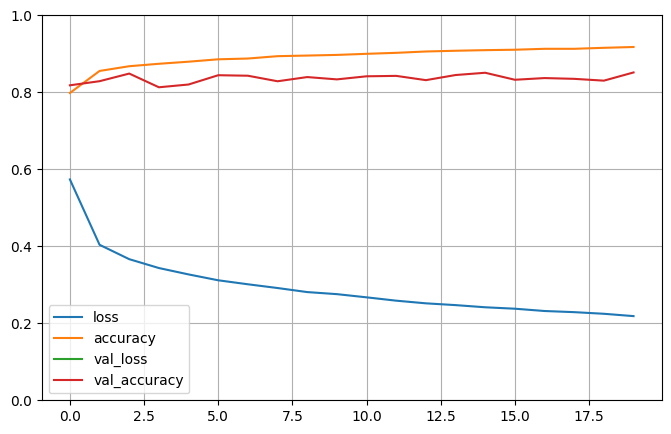

In [15]:
plt=pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.set_ylim(0, 1) # set the vertical range to [0-1] plt.show()

### Evaluate the accuracy of the model (the network)

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", accuracy)


313/313 [==============================] - 0s 903us/step - loss: 64.9708 - accuracy: 0.8515
Test accuracy: 0.8514999747276306


### Predict the label of the thrid data point in the X_test

In [17]:
predictions = model.predict(X_test)
label = np.argmax(predictions[2])

print("Predicted label:", class_names[label])

313/313 [==============================] - 0s 788us/step
Predicted label: Trouser


## Now Build a CNN model to classify the different images of the fashion minst dataset
### the CNN will take the input of the fashion minst images
### CNN will have 6 layers: 
#### First layer is a convolutional layer with 6 filters size 3x3 stride of 1 has padding 
#### Second is a maxpooling layer with a 2x2 kernel size
#### Thrid layer is a convolutional layer with 8 filters size 3x3 stride of 1 has padding 
#### Fourth layer is a maxpooling layer with a 2x2 kernel size
#### Fifth layer is a fully connected (desnse layer) with a 16 units 
#### Sixth layer - fully connected output layer has 10 units

In [18]:
# Define the CNN model
model1 = keras.Sequential()

# Add the layers to the model
model1.add(keras.layers.Conv2D(6, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model1.add(keras.layers.MaxPooling2D((2, 2)))
model1.add(keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
model1.add(keras.layers.MaxPooling2D((2, 2)))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(16, activation='relu'))
model1.add(keras.layers.Dense(10, activation='softmax'))
model1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         440       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 392)               0         
                                                                 
 dense_4 (Dense)             (None, 16)              

model.summary()

### Compile the network

In [19]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


### Train the network

In [20]:
model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
1719/1719 [==============================] - 5s 2ms/step - loss: 0.5776 - accuracy: 0.7937 - val_loss: 90.9548 - val_accuracy: 0.7754
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4100 - accuracy: 0.8549 - val_loss: 71.4961 - val_accuracy: 0.8058
Epoch 3/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3783 - accuracy: 0.8656 - val_loss: 64.3432 - val_accuracy: 0.8192
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3531 - accuracy: 0.8751 - val_loss: 61.5476 - val_accuracy: 0.8187
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3350 - accuracy: 0.8817 - val_loss: 74.9016 - val_accuracy: 0.8037
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3209 - accuracy: 0.8860 - val_loss: 48.6208 - val_accuracy: 0.8574
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3074 - accuracy: 0.8896 - val_loss: 61.1766 - val_ac

### Evlauate the network (model)

In [21]:
test_loss, test_acc = model1.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 0s 1ms/step - loss: 46.5852 - accuracy: 0.8684
Test accuracy: 0.868399977684021
